In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sys.path.insert(0, os.path.abspath('../palin/python'))

In [8]:
from palin.simulation.experiment import Experiment
from palin.simulation.experiments.simple_experiment import SimpleExperiment
from palin.simulation.experiments.double_pass_experiment import DoublePassExperiment
from palin.simulation.trial import Int2Trial, Int1Trial 
from palin.simulation.observers.linear_observer import LinearObserver
from palin.simulation.analysers.kernel_distance import KernelDistance
from palin.simulation.analysers.internal_noise_value import InternalNoiseValue
from palin.simulation.analysers.double_pass_statistics import DoublePassStatistics
from palin.kernels.classification_images import ClassificationImage
from palin.internal_noise.double_pass import DoublePass
from palin.simulation.simulation import Simulation as Sim

ModuleNotFoundError: No module named 'palin.simulation.linear_observer'

## Simulate with internal noise

Single run

In [14]:
DoublePassExperiment

palin.simulation.double_pass_experiment.DoublePassExperiment

In [20]:
# single run: 
exp = DoublePassExperiment(n_trials = 1000, n_repeated=50,
          trial_type = Int2Trial, 
          n_features = 5, 
          external_noise_std = 100)
obs = LinearObserver.with_random_kernel(n_features = exp.n_features, 
                            internal_noise_std = 1, 
                            criteria = 1)
responses = obs.respond_to_experiment(exp)
ana = InternalNoiseValue(internal_noise_extractor = DoublePass, model_file='model.csv')
ana.analyse(exp, obs, responses)

(2.1, 1.7999999999999758)

Simulation

In [7]:
observer_params = {'kernel':[[0,0,0,0,10]],
                   'internal_noise_std':np.arange(0,5.1,0.1), 
                  'criteria':[0]}
experiment_params = {'n_trials':[1000], 
                     'n_repeated':np.arange(50,500,50),
                     'trial_type': [Int2Trial],
                     'n_features': [5],
                     'external_noise_std': [1]}
analyser_params = {'internal_noise_extractor':[DoublePass], 
                   'model_file': ['model.csv'], 
                   'rebuild_model': [False]}
                   #'internal_noise_range':[np.arange(0,5.1,0.1)],
                   #'criteria_range':[np.arange(-5,5,0.1)],
                   #'n_runs':[2]}
                  
sim = Sim(DoublePassExperiment, experiment_params, 
          LinearObserver, observer_params, 
          InternalNoiseValue, analyser_params)
sim_df = sim.run_all(n_runs=10)



Running 459 configs
0 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
1 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.1, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
2 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.2, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_nois

..........;
23 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.3000000000000003, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
24 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.4000000000000004, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
25 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.5, 'criteria': 0, 'internal_noise_extractor': <c

..........;
46 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.6000000000000005, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
47 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.7, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
48 : {'n_trials': 1000, 'n_repeated': 50, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.800000000000001, 'criteria': 0, 'internal_noise_extractor': <cl

..........;
69 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.8, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
70 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.9000000000000001, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
71 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.

..........;
92 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.1000000000000005, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
93 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.2, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
94 : {'n_trials': 1000, 'n_repeated': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.3, 'criteria': 0, 'internal_noise_extractor': <class 'palin.

..........;
115 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.3, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
116 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.4000000000000001, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
117 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.5, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
138 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.6, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
139 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.7, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
140 : {'n_trials': 1000, 'n_repeated': 150, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.8000000000000003, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
161 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.8, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
162 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.9, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
163 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noi

..........;
184 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.1, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
185 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.2, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
186 : {'n_trials': 1000, 'n_repeated': 200, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.3000000000000003, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
207 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.30000000000000004, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
208 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.4, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
209 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.5, 'criteria': 0, 'internal_noise_extractor': <class 'pa

..........;
230 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.6, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
231 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.7, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
232 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.8000000000000003, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
253 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.9, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
254 : {'n_trials': 1000, 'n_repeated': 250, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 5.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
255 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noi

..........;
276 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.1, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
277 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.2, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
278 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.3000000000000003, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
299 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.4, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
300 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.5, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
301 : {'n_trials': 1000, 'n_repeated': 300, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.6000000000000005, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
322 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.6, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
323 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.7000000000000002, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
324 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.8, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
345 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.9000000000000004, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
346 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
347 : {'n_trials': 1000, 'n_repeated': 350, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 4.1000000000000005, 'criteria': 0, 'internal_noise_extracto

..........;
368 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.1, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
369 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.2000000000000002, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
370 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 1.3, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
391 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.4000000000000004, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
392 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.5, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
393 : {'n_trials': 1000, 'n_repeated': 400, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.6, 'criteria': 0, 'internal_noise_extractor': <class 'pal

..........;
414 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.6000000000000001, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
415 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.7000000000000001, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
416 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 0.8, 'criteria': 0, 'internal_noise_extracto

..........;
437 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 2.9000000000000004, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
438 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.0, 'criteria': 0, 'internal_noise_extractor': <class 'palin.internal_noise.double_pass.DoublePass'>, 'model_file': 'model.csv', 'rebuild_model': False}
..........;
439 : {'n_trials': 1000, 'n_repeated': 450, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 5, 'external_noise_std': 1, 'kernel': [0, 0, 0, 0, 10], 'internal_noise_std': 3.1, 'criteria': 0, 'internal_noise_extractor': <class 'pal

<Axes: xlabel='n_trials', ylabel='estimated_internal_noise'>

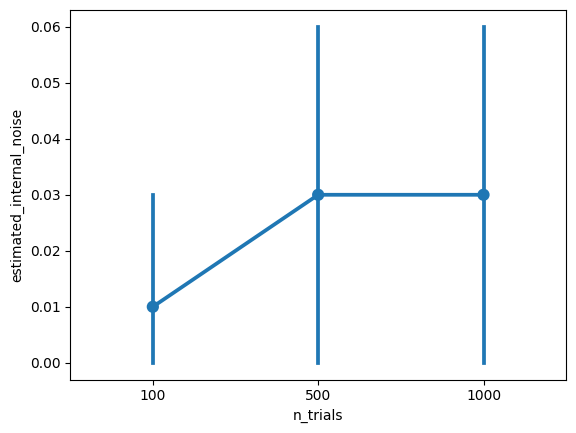

In [29]:
sns.pointplot(data=sim_df, x='n_trials', y='estimated_internal_noise')

In [219]:
model = DoublePass.build_model(internal_noise_range=np.arange(0,5,.1),
                               criteria_range=np.arange(-5,5,.5),
                               n_repeated_trials=1000, n_runs=10)

Rebuilding double-pass model
Running 1000 configs
0 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.0, 'criteria': -5.0}
..........;
1 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.0, 'criteria': -4.5}
..........;
2 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.0, 'criteria': -4.0}
..........;
3 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.0, 'criteria': -3.5}
..........;
4 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.In

..........;
38 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.1, 'criteria': 4.0}
..........;
39 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.1, 'criteria': 4.5}
..........;
40 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.2, 'criteria': -5.0}
..........;
41 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.2, 'criteria': -4.5}
..........;
42 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'extern

..........;
75 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.30000000000000004, 'criteria': 2.5}
..........;
76 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.30000000000000004, 'criteria': 3.0}
..........;
77 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.30000000000000004, 'criteria': 3.5}
..........;
78 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.30000000000000004, 'criteria': 4.0}
..........;
79 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class

..........;
113 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.5, 'criteria': 1.5}
..........;
114 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.5, 'criteria': 2.0}
..........;
115 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.5, 'criteria': 2.5}
..........;
116 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.5, 'criteria': 3.0}
..........;
117 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ext

..........;
149 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.7000000000000001, 'criteria': -0.5}
..........;
150 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.7000000000000001, 'criteria': 0.0}
..........;
151 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.7000000000000001, 'criteria': 0.5}
..........;
152 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.7000000000000001, 'criteria': 1.0}
..........;
153 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <cla

..........;
187 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.9, 'criteria': -1.5}
..........;
188 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.9, 'criteria': -1.0}
..........;
189 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.9, 'criteria': -0.5}
..........;
190 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 0.9, 'criteria': 0.0}
..........;
191 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, '

..........;
225 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.1, 'criteria': -2.5}
..........;
226 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.1, 'criteria': -2.0}
..........;
227 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.1, 'criteria': -1.5}
..........;
228 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.1, 'criteria': -1.0}
..........;
229 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 

..........;
262 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.3, 'criteria': -4.0}
..........;
263 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.3, 'criteria': -3.5}
..........;
264 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.3, 'criteria': -3.0}
..........;
265 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.3, 'criteria': -2.5}
..........;
266 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 

..........;
299 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.4000000000000001, 'criteria': 4.5}
..........;
300 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.5, 'criteria': -5.0}
..........;
301 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.5, 'criteria': -4.5}
..........;
302 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.5, 'criteria': -4.0}
..........;
303 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_

..........;
337 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.6, 'criteria': 3.5}
..........;
338 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.6, 'criteria': 4.0}
..........;
339 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.6, 'criteria': 4.5}
..........;
340 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.7000000000000002, 'criteria': -5.0}
..........;
341 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_fe

..........;
374 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.8, 'criteria': 2.0}
..........;
375 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.8, 'criteria': 2.5}
..........;
376 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.8, 'criteria': 3.0}
..........;
377 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 1.8, 'criteria': 3.5}
..........;
378 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ext

..........;
411 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.0, 'criteria': 0.5}
..........;
412 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.0, 'criteria': 1.0}
..........;
413 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.0, 'criteria': 1.5}
..........;
414 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.0, 'criteria': 2.0}
..........;
415 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ext

..........;
449 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.2, 'criteria': -0.5}
..........;
450 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.2, 'criteria': 0.0}
..........;
451 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.2, 'criteria': 0.5}
..........;
452 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.2, 'criteria': 1.0}
..........;
453 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ex

..........;
486 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.4000000000000004, 'criteria': -2.0}
..........;
487 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.4000000000000004, 'criteria': -1.5}
..........;
488 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.4000000000000004, 'criteria': -1.0}
..........;
489 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.4000000000000004, 'criteria': -0.5}
..........;
490 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <

..........;
523 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.6, 'criteria': -3.5}
..........;
524 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.6, 'criteria': -3.0}
..........;
525 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.6, 'criteria': -2.5}
..........;
526 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.6, 'criteria': -2.0}
..........;
527 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 

..........;
561 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.8000000000000003, 'criteria': -4.5}
..........;
562 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.8000000000000003, 'criteria': -4.0}
..........;
563 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.8000000000000003, 'criteria': -3.5}
..........;
564 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.8000000000000003, 'criteria': -3.0}
..........;
565 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <

..........;
597 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.9000000000000004, 'criteria': 3.5}
..........;
598 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.9000000000000004, 'criteria': 4.0}
..........;
599 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 2.9000000000000004, 'criteria': 4.5}
..........;
600 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.0, 'criteria': -5.0}
..........;
601 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simul

..........;
635 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.1, 'criteria': 2.5}
..........;
636 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.1, 'criteria': 3.0}
..........;
637 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.1, 'criteria': 3.5}
..........;
638 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.1, 'criteria': 4.0}
..........;
639 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ext

..........;
708 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.5, 'criteria': -1.0}
..........;
709 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.5, 'criteria': -0.5}
..........;
710 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.5, 'criteria': 0.0}
..........;
711 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.5, 'criteria': 0.5}
..........;
712 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'e

..........;
746 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.7, 'criteria': -2.0}
..........;
747 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.7, 'criteria': -1.5}
..........;
748 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.7, 'criteria': -1.0}
..........;
749 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.7, 'criteria': -0.5}
..........;
750 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 

..........;
783 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.9000000000000004, 'criteria': -3.5}
..........;
784 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.9000000000000004, 'criteria': -3.0}
..........;
785 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.9000000000000004, 'criteria': -2.5}
..........;
786 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 3.9000000000000004, 'criteria': -2.0}
..........;
787 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <

..........;
820 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.1000000000000005, 'criteria': -5.0}
..........;
821 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.1000000000000005, 'criteria': -4.5}
..........;
822 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.1000000000000005, 'criteria': -4.0}
..........;
823 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.1000000000000005, 'criteria': -3.5}
..........;
824 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <

..........;
857 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.2, 'criteria': 3.5}
..........;
858 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.2, 'criteria': 4.0}
..........;
859 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.2, 'criteria': 4.5}
..........;
860 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.3, 'criteria': -5.0}
..........;
861 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ex

..........;
895 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.4, 'criteria': 2.5}
..........;
896 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.4, 'criteria': 3.0}
..........;
897 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.4, 'criteria': 3.5}
..........;
898 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.4, 'criteria': 4.0}
..........;
899 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'ext

..........;
969 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.800000000000001, 'criteria': -0.5}
..........;
970 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.800000000000001, 'criteria': 0.0}
..........;
971 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.800000000000001, 'criteria': 0.5}
..........;
972 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 1, 'external_noise_std': 1, 'kernel': [1], 'internal_noise_std': 4.800000000000001, 'criteria': 1.0}
..........;
973 : {'n_trials': 1000, 'n_repeated': 1000, 'trial_type': <class '

TypeError: get_metric_names() missing 1 required positional argument: 'self'

In [ ]:
model.to_csv('model_large.csv')

## Simulate with kernels

Single run

In [32]:
# single run: 
exp = SimpleExperiment(n_trials = 100,
          trial_type = Int2Trial, 
          n_features = 5, 
          external_noise_std = 100)
obs = LinearObserver.with_random_kernel(n_features = 5, 
                            internal_noise_std = 1, 
                            criteria = 0)
responses = obs.respond_to_experiment(exp)
ka = KernelDistance(LMMExtractor)
ka.analyse(exp, obs, responses)

0.9799297710374408

In [52]:
# obs = Obs.with_random_kernel(n_features=5, internal_noise_std=0, criteria=0)

observer_params = {'kernel':['random'],
                   'internal_noise_std':[1], 
                  'criteria':[0]}
experiment_params = {'n_trials':[100],#np.arange(1,1000,100),
                     'trial_type': [Int2Trial],
                     'n_features': np.arange(2,10,1),
                     'external_noise_std': [100]}
analyser_params = {'kernel_extractor':[ClassificationImage], 
                  'distance':['CORR']}


sim = Sim(SimpleExperiment, experiment_params, 
          LinearObserver, observer_params, 
          KernelDistance, analyser_params)
sim_df = sim.run_all(n_runs=10)






Running 8 configs
0 : {'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 2, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
..........;
1 : {'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 3, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
..........;
2 : {'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Trial'>, 'n_features': 4, 'external_noise_std': 100, 'kernel': 'random', 'internal_noise_std': 1, 'criteria': 0, 'kernel_extractor': <class 'palin.kernels.classification_images.ClassificationImage'>, 'distance': 'CORR'}
..........;
3 : {'n_trials': 100, 'trial_type': <class 'palin.simulation.trial.Int2Tr

In [50]:
sim_df

,n_trials,trial_type,n_features,external_noise_std,kernel,internal_noise_std,criteria,kernel_extractor,distance,run,corr
0,100,<class 'palin.simulation.trial.Int2Trial'>,1,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,0,NaN
1,100,<class 'palin.simulation.trial.Int2Trial'>,1,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,1,NaN
2,100,<class 'palin.simulation.trial.Int2Trial'>,1,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,2,NaN
3,100,<class 'palin.simulation.trial.Int2Trial'>,1,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,3,NaN
4,100,<class 'palin.simulation.trial.Int2Trial'>,1,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85,100,<class 'palin.simulation.trial.Int2Trial'>,9,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,5,0.960964
86,100,<class 'palin.simulation.trial.Int2Trial'>,9,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,6,0.961439
87,100,<class 'palin.simulation.trial.Int2Trial'>,9,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,7,0.932762
88,100,<class 'palin.simulation.trial.Int2Trial'>,9,100,random,1,0,<class 'palin.kernels.classification_images.Cl...,CORR,8,0.958845


<Axes: xlabel='n_features', ylabel='corr'>

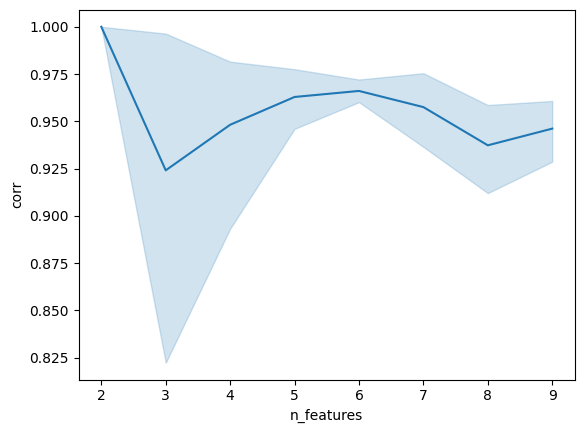

In [51]:
sns.lineplot(data=sim_df, 
             x='n_features',
             y='corr')#, hue='n_features')